# 角点检测

角点是除了直线外另外一种值的检测的特征. 它表现为边缘相交的点.

In [4]:
import cv2

import utils

import numpy as np

import matplotlib.pyplot as plt

以一张华夫饼的图片作为例子:

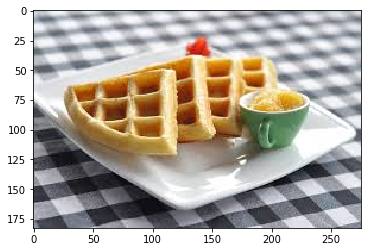

In [2]:
image = utils.imread('images/waffle.jpg')

plt.imshow(image)

使用OpenCV检测角点.

API参见[cornerHarris](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cv2.cornerHarris)

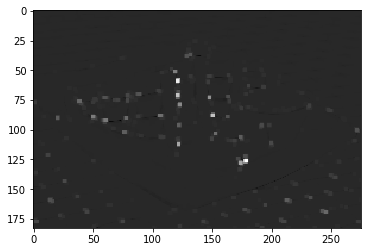

In [5]:
gray = utils.rgb2gray(image)
gray = np.float32(gray)

# 检测角点
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# 将角点膨胀
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

下面筛选这些角点中的强角点并将它们在原图中标出来.

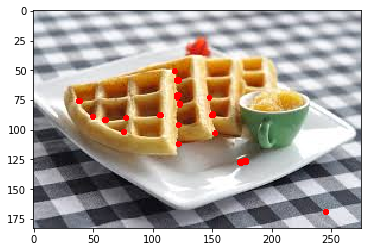

In [8]:
# 定义强角点的阈值, 这里定义为最大角点的倍数
thresh = 0.25 * dst.max()

corner_image = np.copy(image)

for i in range(0, dst.shape[0]):
    for j in range(0, dst.shape[1]):
        if dst[i, j] > thresh:
            cv2.circle(corner_image, (j, i), 1, (255, 0, 0), 1)
            
plt.imshow(corner_image)